## importações

In [29]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow import keras

import matplotlib.pyplot as plt


## datasets

In [30]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

## Sobbre o dataset utilizado

In [31]:
builder = tfds.builder('tf_flowers')
builder.info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='C:\\Users\\User\\tensorflow_datasets\\tf_flowers\\3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

## Leitura de dados

In [32]:
train_data, train_info = tfds.load(name='tf_flowers', split='train', with_info=True)

## Leitura de imagens

In [33]:
train_images = np.array([elem['image'].numpy().astype(np.float32) for elem in train_data])
train_labels = np.array([elem['label'].numpy() for elem in train_data])

C:\Users\User\AppData\Local\Temp\ipykernel_11776\615889020.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_images = np.array([elem['image'].numpy().astype(np.float32) for elem in train_data])


In [34]:
train_images[1].shape

(212, 320, 3)

In [36]:
IMG_WIDTH = 200
IMG_HEIGHT = 200
resize = keras.layers.Resizing(IMG_HEIGHT, IMG_WIDTH)
train_images = np.array([resize(elem) for elem in train_images])
train_images = train_images/255.0

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


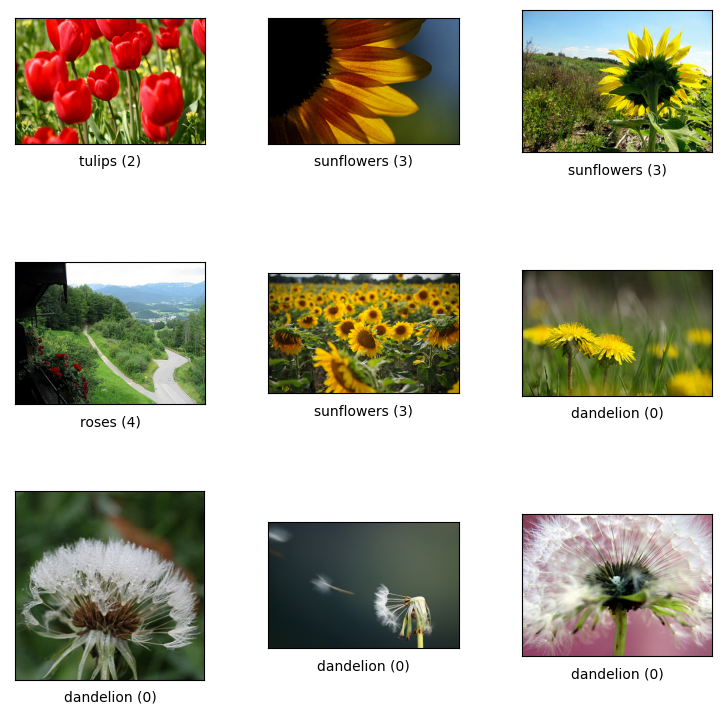

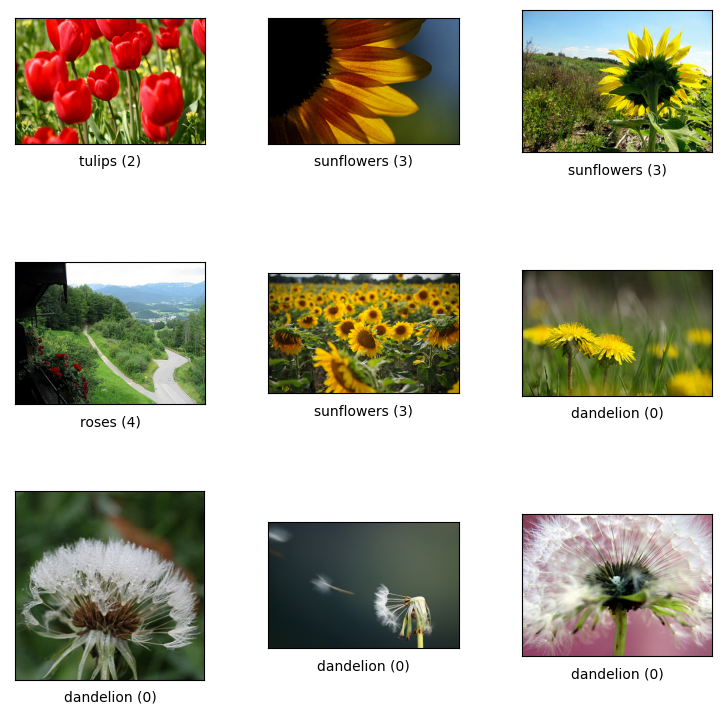

In [37]:
tfds.show_examples(train_info, train_data)

In [38]:
train_images.shape

(3670, 200, 200, 3)

## Construção do modelo funcional

In [39]:
inputs = keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
avgpool = keras.layers.AveragePooling2D(2, 3, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
conv1 = keras.layers.Conv2D(128, 3, activation='relu')
conv2 = keras.layers.Conv2D(64, 5, activation='relu')
conv3 = keras.layers.Conv2D(32, 7, activation='relu')
maxpool = keras.layers.MaxPool2D(2, 2)
dropout = keras.layers.Dropout(0.7)
flatten = keras.layers.Flatten()
dense1  = keras.layers.Dense(128, activation='relu')
dense2  = keras.layers.Dense(64, activation='relu')
output = keras.layers.Dense(5, activation='softmax')

## Passar dados através das camadas - Rede Funcional

In [40]:
x = avgpool(inputs)
x = conv1(x)
x = conv2(x)
x = conv3(x)
x = maxpool(x)
x = dropout(x)
x = flatten(x)
x = dense1(x)
x = dense2(x)
out = output(x)

## Modelo

In [41]:
model = keras.Model(inputs=inputs, outputs=out, name='tf-flowers')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
115/115 [==============================] - 256s 2s/step - loss: 1.5972 - accuracy: 0.2447
Epoch 2/5
115/115 [==============================] - 259s 2s/step - loss: 1.5145 - accuracy: 0.3232
Epoch 3/5
115/115 [==============================] - 251s 2s/step - loss: 1.2939 - accuracy: 0.4507
Epoch 4/5
115/115 [==============================] - 249s 2s/step - loss: 1.1171 - accuracy: 0.5480
Epoch 5/5
115/115 [==============================] - 245s 2s/step - loss: 0.9761 - accuracy: 0.6074


## Salvando e recarregando o modelo

In [42]:
model.save("./tf-flowers.h5")

In [43]:
saved_model = keras.models.load_model("./tf-flowers.h5")
saved_model.summary()

Model: "tf-flowers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 average_pooling2d_1 (Averag  (None, 67, 67, 3)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 65, 65, 128)       3584      
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        204864    
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 32)        100384    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                    

## Continuação do treinamento

In [44]:
saved_model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
115/115 [==============================] - 246s 2s/step - loss: 0.8639 - accuracy: 0.6616
Epoch 2/5
115/115 [==============================] - 241s 2s/step - loss: 0.7360 - accuracy: 0.7120
Epoch 3/5
115/115 [==============================] - 246s 2s/step - loss: 0.6341 - accuracy: 0.7540
Epoch 4/5
115/115 [==============================] - 243s 2s/step - loss: 0.5260 - accuracy: 0.8063
Epoch 5/5
115/115 [==============================] - 247s 2s/step - loss: 0.4298 - accuracy: 0.8409


In [45]:
saved_model.save("./tf-flowers.h5")
saved_model = keras.models.load_model("./tf-flowers.h5")

In [ ]:
saved_model.fit(train_images, train_labels, epochs=5, batch_size=32)

## salvando o modelo e armazenando o modelo no banco

In [ ]:
saved_model.save("./tf-flowers.h5")

In [ ]:
import json 
from pymongo import MongoClient

myclient = MongoClient("mongodb://localhost:27017")
db = myclient["Grupo7"]

In [ ]:
Collection = db["tf_flowers"] 
with open('02 - tf_flowers.ipynb') as file: 
    file_data = json.load(file)
if isinstance(file_data, list):
    Collection.insert_many(file_data)
else:
    Collection.insert_one(file_data)